In [9]:
import numpy as np


class LinearRegressionBatch:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

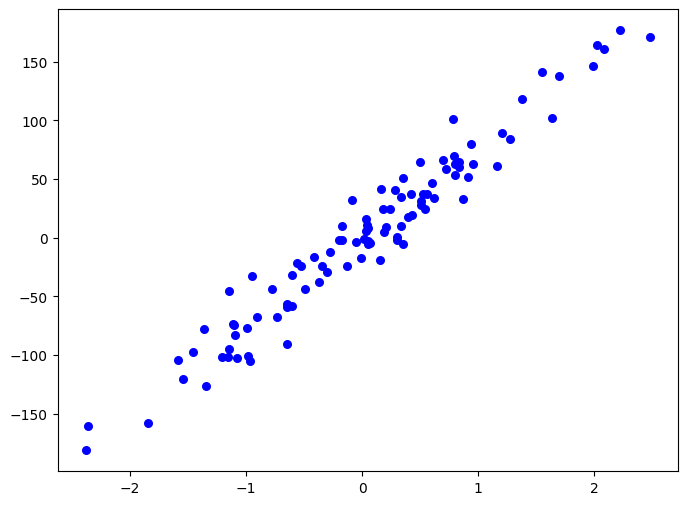

MSE: 305.7719958301902
Mean of y_test: 6.273312051262716
Total Sum of Squares: 81270.51469917125
Residual Sum of Sqaures RSS: 6115.439916603804
R2: 0.9247520464311005


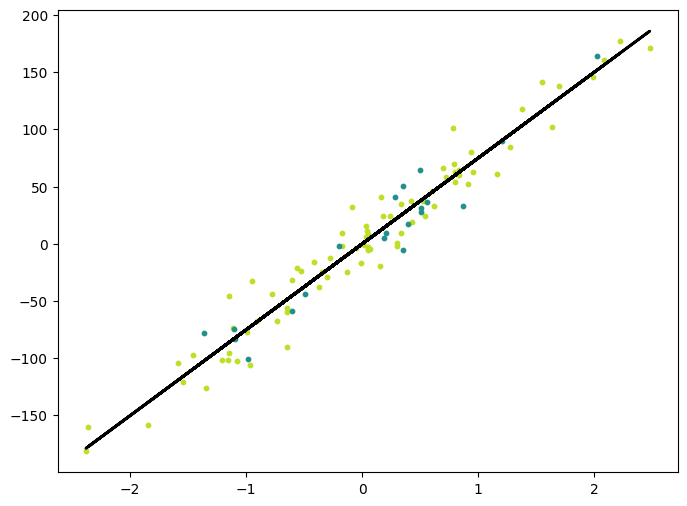

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

reg = LinearRegressionBatch(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(f"MSE: {mse}")

y_mean = np.mean(y_test)
sse = np.sum((y_test - predictions) **2)
sst = np.sum((y_test - y_mean) ** 2)
r2 = 1 - (sse/sst)
print(f"Mean of y_test: {y_mean}")
print(f"Total Sum of Squares: {sst}")
print(f"Residual Sum of Sqaures RSS: {sse}")
print(f"R2: {r2}")

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

In [7]:
import numpy as np


class LinearRegressionSGD:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            indices = np.random.permutation(n_samples)
            for i in indices:
                X_i = X[i, :].reshape(1, -1)
                y_i = y[i]

                y_pred = np.dot(X_i, self.weights) + self.bias

                dw = (1/n_samples) * np.dot(X_i.T, (y_pred-y_i))
                db = (1/n_samples) * np.sum(y_pred-y_i)

                self.weights = self.weights - self.lr * dw
                self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

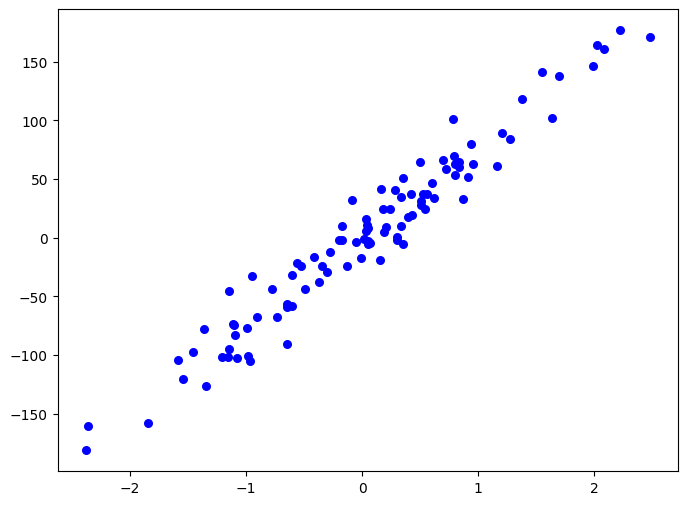

MSE: 305.77076499564066
Mean of y_test: 6.273312051262716
Total Sum of Squares: 81270.51469917125
Residual Sum of Sqaures RSS: 6115.415299912814
R2: 0.9247523493292805


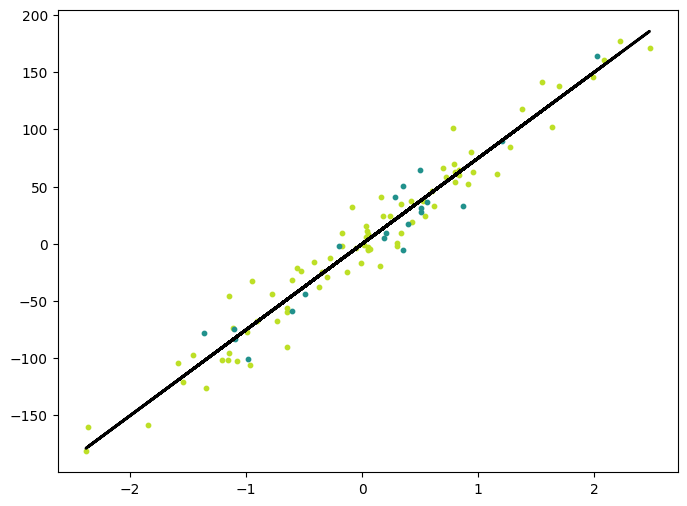

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

reg = LinearRegressionSGD(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(f"MSE: {mse}")

y_mean = np.mean(y_test)
sse = np.sum((y_test - predictions) **2)
sst = np.sum((y_test - y_mean) ** 2)
r2 = 1 - (sse/sst)
print(f"Mean of y_test: {y_mean}")
print(f"Total Sum of Squares: {sst}")
print(f"Residual Sum of Sqaures RSS: {sse}")
print(f"R2: {r2}")

y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()